# Visualizing ARC Tasks

JaxARC offers two complementary visualization methods:

1. **SVG Visualization** - High-quality vector graphics ideal for:
   - Jupyter notebooks and IPython
   - Documentation and presentations
   - Publication-quality figures

2. **Rich Terminal Output** - Colored console output perfect for:
   - Interactive development
   - Quick debugging
   - Terminal-based workflows

Both methods work with the same data structures and produce beautiful, color-accurate representations of ARC grids.

In [1]:
# Import required libraries
from __future__ import annotations

import jax

from jaxarc.configs import DatasetConfig
from jaxarc.parsers.arc_agi import ArcAgiParser
from jaxarc.utils.core import get_config

# Load configuration
cfg = get_config()
dataset_config = DatasetConfig.from_hydra(cfg.dataset)

# Initialize parser
parser = ArcAgiParser(dataset_config)

2025-11-18 22:47:39.486 | INFO     | jaxarc.parsers.arc_agi:_scan_available_tasks:110 - Found 1000 tasks in /Users/aadam/workspace/JaxARC/data/ARC-AGI-2/data/training (lazy loading - tasks loaded on-demand)


## Setup: Loading a Task

First, let's load a random ARC task using the parser. We'll use this task throughout the tutorial to demonstrate different visualization techniques.

In [2]:
# Get a random task (using seed 123 for reproducibility)
key = jax.random.PRNGKey(123)
task = parser.get_random_task(key)

# Display task information
print(f"Task Index: {task.task_index}")
print(f"Training Pairs: {task.num_train_pairs}")
print(f"Test Pairs: {task.num_test_pairs}")

2025-11-18 22:47:39.570 | DEBUG    | jaxarc.parsers.arc_agi:_load_task_from_disk:312 - Loaded task 'e40b9e2f' from disk
2025-11-18 22:47:39.769 | DEBUG    | jaxarc.parsers.base_parser:_log_parsing_stats:479 - Task e40b9e2f: 3 train pairs, 1 test pairs, max grid size: 10x10
2025-11-18 22:47:39.770 | DEBUG    | jaxarc.utils.task_manager:get_global_task_manager:236 - Created global task ID manager
2025-11-18 22:47:39.770 | DEBUG    | jaxarc.utils.task_manager:register_task:72 - Registered task 'e40b9e2f' with index 0
2025-11-18 22:47:39.769 | DEBUG    | jaxarc.parsers.base_parser:_log_parsing_stats:479 - Task e40b9e2f: 3 train pairs, 1 test pairs, max grid size: 10x10
2025-11-18 22:47:39.770 | DEBUG    | jaxarc.utils.task_manager:get_global_task_manager:236 - Created global task ID manager
2025-11-18 22:47:39.770 | DEBUG    | jaxarc.utils.task_manager:register_task:72 - Registered task 'e40b9e2f' with index 0


Task Index: 0
Training Pairs: 3
Test Pairs: 1


## Method 1: Single Grid Visualization

Let's start by visualizing individual grids. This is useful when you want to inspect a specific input or output grid in detail.

Input grid shape: (10, 10)
Output grid shape: (10, 10)

SVG Visualization (Input):


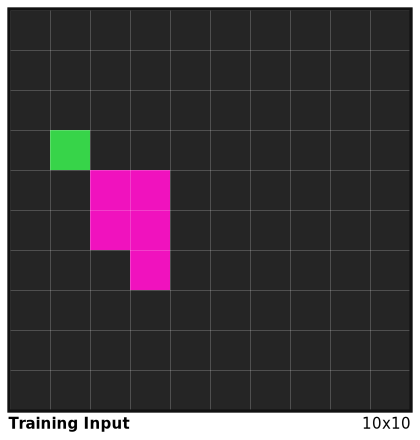

In [3]:
# Import visualization functions
from IPython.display import display

from jaxarc.utils.visualization import draw_grid_svg, visualize_grid_rich

# Get the first training pair
task_pair = task.get_train_pair(0)
input_grid = task_pair.input_grid
output_grid = task_pair.output_grid

print(f"Input grid shape: {input_grid.shape}")
print(f"Output grid shape: {output_grid.shape}")
print()

# SVG visualization - high quality for notebooks
print("SVG Visualization (Input):")
input_svg = draw_grid_svg(input_grid, label="Training Input")
display(input_svg)


SVG Visualization (Output):


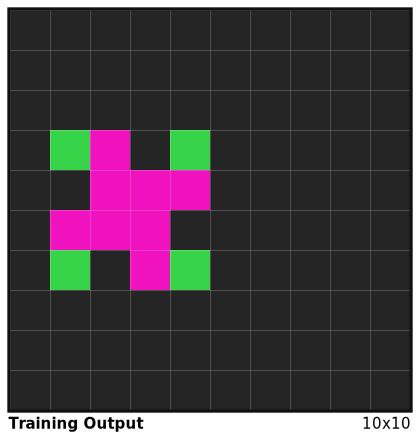

In [4]:
print("\nSVG Visualization (Output):")
output_svg = draw_grid_svg(output_grid, label="Training Output")
display(output_svg)

In [5]:
# Rich terminal visualization - great for quick debugging
print("\nRich Terminal Output (Input):")
display(visualize_grid_rich(input_grid, title="Training Input (Rich)"))


Rich Terminal Output (Input):


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Training Input (Rich) (10x10) ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

In [6]:
print("\nRich Terminal Output (Output):")
display(visualize_grid_rich(output_grid, title="Training Output (Rich)"))


Rich Terminal Output (Output):


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Training Output (Rich) (10x10) ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

## Method 2: Input/Output Pair Visualization

Now let's visualize the transformation from input to output. This side-by-side view makes it easy to see the pattern or rule that transforms the input into the output. **Arrow indicator** shows the transformation direction

🎨 SVG Pair Visualization:


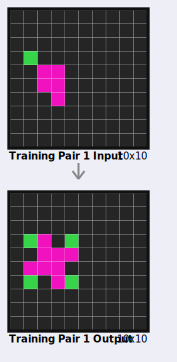

In [7]:
# Import pair visualization functions
from jaxarc.utils.visualization import draw_task_pair_svg, visualize_task_pair_rich

# SVG pair visualization - shows transformation clearly
print("🎨 SVG Pair Visualization:")
pair_svg = draw_task_pair_svg(
    input_grid=input_grid,
    output_grid=output_grid,
    label="Training Pair 1",
)
display(pair_svg)

In [8]:
# Rich terminal pair visualization
print("\n💻 Rich Terminal Pair Output:")
visualize_task_pair_rich(
    input_grid=input_grid,
    output_grid=output_grid,
    title="Training Pair 1 (Rich)",
)


💻 Rich Terminal Pair Output:


╭──────────────────────────────────── Training Pair 1 (Rich) - Input (10x10) ─────────────────────────────────────╮
│████████████████████                                                                                             │
│████████████████████                                                                                             │
│████████████████████                                                                                             │
│████████████████████                                                                                             │
│████████████████████                                                                                             │
│████████████████████                                                                                             │
│████████████████████                                                                                             │
│████████████████████                                                                                             │
│████████████████████                                                                                             │
│████████████████████                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

↓

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Training Pair 1 (Rich) - Output (10x10) ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┃████████████████████                                                                                             ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

## Method 3: Complete Task Visualization

For understanding the full task, we can visualize all training examples together. This comprehensive view helps identify patterns across multiple examples.

### Visualization Options

- `include_test=False` - Show only training pairs (outputs known)
- `include_test=True` - Include test inputs with "?" for unknown outputs
- `include_test="all"` - Show everything including test outputs (if available)

🎨 Complete Task - Training Only:


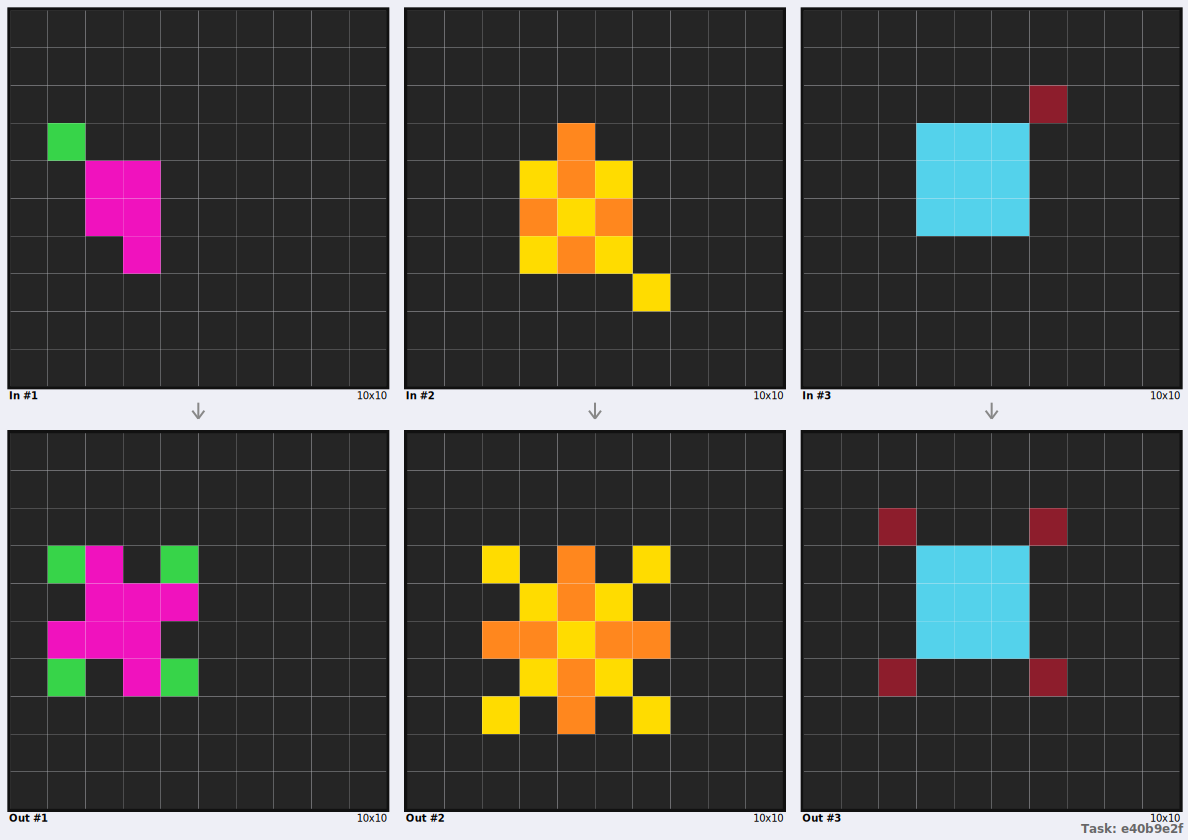

In [9]:
# Import complete task visualization functions
from jaxarc.utils.visualization import (
    draw_parsed_task_data_svg,
    visualize_parsed_task_data_rich,
)

# Option 1: Training examples only
print("🎨 Complete Task - Training Only:")
task_svg = draw_parsed_task_data_svg(
    task_data=task,
    include_test=False,  # Show only training pairs
)
display(task_svg)


🎨 Complete Task - With Test Input:


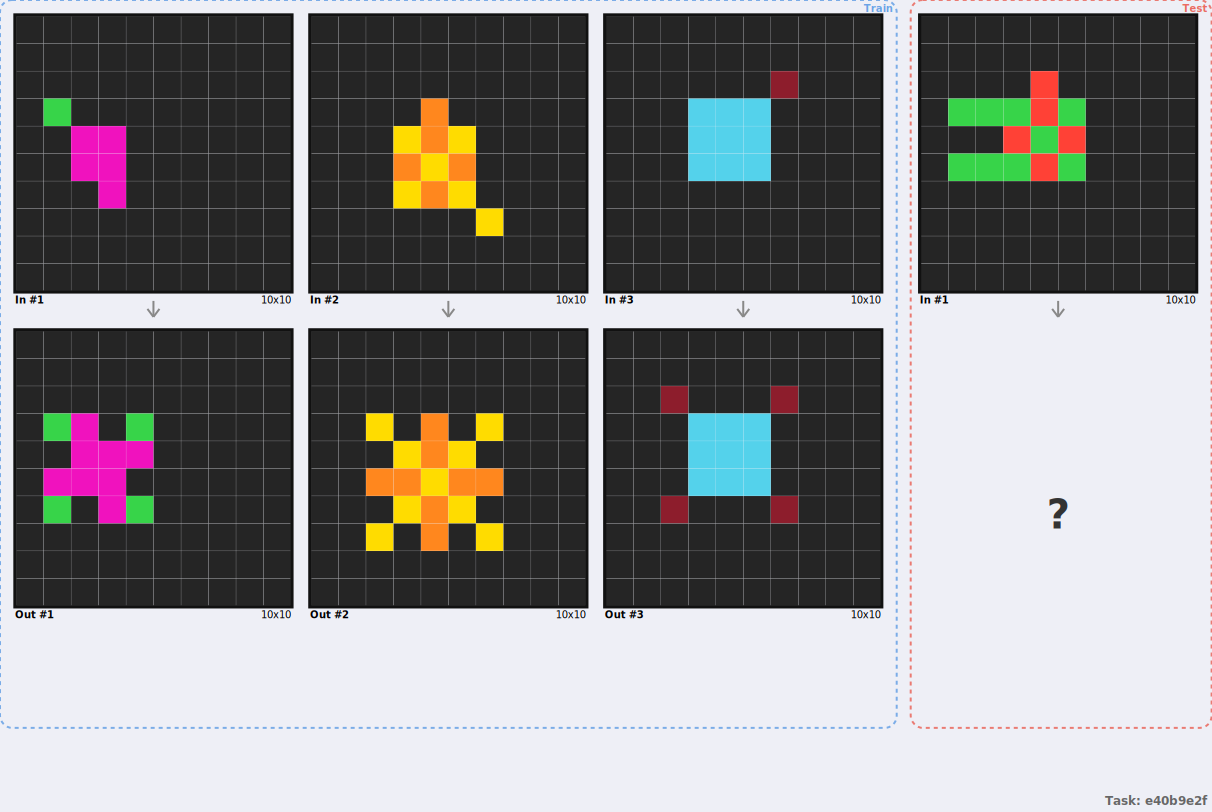

In [10]:
# Option 2: Include test inputs (outputs unknown)
print("\n🎨 Complete Task - With Test Input:")
task_svg_with_test = draw_parsed_task_data_svg(
    task_data=task,
    include_test=True,  # Show test inputs with "?" for outputs
)
display(task_svg_with_test)

In [11]:
# Rich terminal version - compact overview
print("\n💻 Rich Terminal - Complete Task:")
visualize_parsed_task_data_rich(
    task_data=task,
    show_test=True,
    show_coordinates=False,
    show_numbers=False,
    double_width=True,
)


💻 Rich Terminal - Complete Task:


╭─ Task: e40b9e2f ────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                     Training Examples: 3  Test Examples: 1                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ Training Examples (3) ─────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                 │
│ ╭────────────────────────────────────────────── Input 1 (10x10) ──────────────────────────────────────────────╮ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                        ↓                                                        │
│                                                                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Output 1 (10x10) ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛ │
│ ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── │
│ ╭────────────────────────────────────────────── Input 2 (10x10) ──────────────────────────────────────────────╮ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                 

╭─ Test Examples (1) ─────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                 │
│ ╭─────────────────────────────────────────── Test Input 1 (10x10) ────────────────────────────────────────────╮ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ │████████████████████                                                                                         │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                        ↓                                                        │
│                                                                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Test Output 1 (10x10) ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┃████████████████████                                                                                         ┃ │
│ ┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛ │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

### Customization Options

All visualization functions support customization:

```python
# Grid customization
draw_grid_svg(grid, max_width=15.0, max_height=10.0, label="Custom")

# Show coordinates in terminal
visualize_grid_rich(grid, show_coordinates=True, show_numbers=True)

# Custom task layout
draw_parsed_task_data_svg(task, width=40.0, border_colors=["#0066cc", "#00cc66"])
```

## Iterating Through Training Examples

When analyzing a task, you often want to examine each training example individually. This loop demonstrates how to visualize multiple pairs programmatically.

### Practical Use Cases

- **Pattern recognition** - Study how the transformation rule applies across examples
- **Edge case detection** - Identify examples that behave differently
- **Agent debugging** - Compare your agent's output with expected results for each example


Training Pair 1 / 3


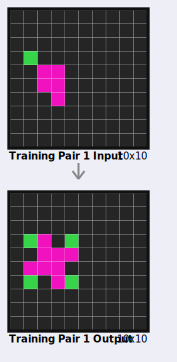


Training Pair 2 / 3


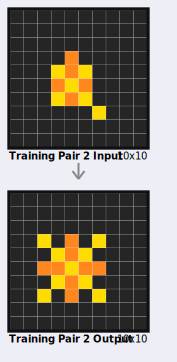


Test Input (Output Unknown)


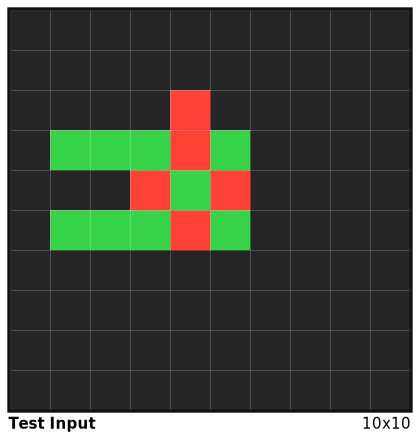

In [12]:
# Iterate through training pairs (showing first 2 for documentation brevity)
from IPython.display import display

num_pairs_to_show = min(2, task.num_train_pairs)

for i in range(num_pairs_to_show):
    pair = task.get_train_pair(i)

    print(f"\n{'=' * 60}")
    print(f"Training Pair {i + 1} / {task.num_train_pairs}")
    print(f"{'=' * 60}")

    # Visualize this pair
    pair_svg = draw_task_pair_svg(
        input_grid=pair.input_grid,
        output_grid=pair.output_grid,
        label=f"Training Pair {i + 1}",
    )
    display(pair_svg)

# Show test input if available
if task.num_test_pairs > 0:
    print(f"\n{'=' * 60}")
    print("Test Input (Output Unknown)")
    print(f"{'=' * 60}")
    test_input = task.get_test_input_grid(0)
    display(draw_grid_svg(test_input, label="Test Input"))

## Method 4: Environment Rendering

When interacting with the environment (RL agents or interactive scripts), you can use the unified `env.render()` API.

### Standard Render Modes

The environment supports three standard modes:
- `rgb_array`: Returns a numpy array (H, W, 3)
- `ansi`: Returns a string for terminal display
- `svg`: Returns an SVG string of the current grid


In [13]:
import jax.random as jr

from jaxarc.configs import JaxArcConfig
from jaxarc.registration import make
from jaxarc.utils.core import get_config

# Create an environment
config = JaxArcConfig.from_hydra(get_config(overrides=["dataset=mini_arc"]))
env, env_params = make("Mini-Most_Common_color_l6ab0lf3xztbyxsu3p", config=config)

# Reset
key = jr.PRNGKey(42)
state, _ = env.reset(key, env_params)

# 1. ANSI Render (for terminal)
print("ANSI Render:")
print(env.render(state, mode="ansi"))

# 2. SVG Render (for notebooks)
print("\nSVG Render:")
from IPython.display import HTML, display

display(HTML(env.render(state, mode="svg")))

2025-11-18 22:47:44.316 | DEBUG    | jaxarc.utils.dataset_manager:validate_dataset:212 - Dataset validation passed: /Users/aadam/workspace/JaxARC/data/MiniARC
2025-11-18 22:47:44.317 | DEBUG    | jaxarc.utils.dataset_manager:ensure_dataset_available:81 - Dataset 'MiniARC' found at /Users/aadam/workspace/JaxARC/data/MiniARC
2025-11-18 22:47:44.318 | INFO     | jaxarc.parsers.mini_arc:_validate_grid_constraints:104 - MiniARC parser configured with optimal 5x5 grid constraints
2025-11-18 22:47:44.320 | INFO     | jaxarc.parsers.mini_arc:_scan_available_tasks:131 - Found 149 tasks in MiniARC dataset (lazy loading - tasks loaded on-demand, optimized for 5x5 grids)
2025-11-18 22:47:44.321 | DEBUG    | jaxarc.parsers.mini_arc:_load_task_from_disk:171 - Loaded MiniARC task 'Most_Common_color_l6ab0lf3xztbyxsu3p' from disk
2025-11-18 22:47:44.317 | DEBUG    | jaxarc.utils.dataset_manager:ensure_dataset_available:81 - Dataset 'MiniARC' found at /Users/aadam/workspace/JaxARC/data/MiniARC
2025-11-1

ANSI Render:


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Grid (5x5) ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓

### Advanced: Step Visualization Wrapper

For detailed analysis of agent actions, use the `StepVisualizationWrapper`. It enables `mode="detailed"` which produces a rich SVG showing:
- Before/After states
- Action taken
- Changed cells highlighted
- Reward received


In [14]:
import jax.numpy as jnp

from jaxarc.wrappers import StepVisualizationWrapper

# Wrap the environment
viz_env = StepVisualizationWrapper(env)

# Take a dummy action to generate a transition
# (Selecting top-left corner and filling with color 2)
h, w = state.working_grid.shape
selection = jnp.zeros((h, w), dtype=bool)
selection = selection.at[:2, :2].set(True)

action = {
    "operation": 0,  # FILL
    "selection": selection,
    "color": 2,
}

# Step
next_state, timestep = viz_env.step(state, action, env_params)

# Render detailed view
print("Detailed Step Visualization:")
display(HTML(viz_env.render(next_state, mode="detailed")))

Detailed Step Visualization:
